In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3f509ebe-f6ea-423a-8765-74d8f37a1a76',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-08T11:10:13.215Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9841}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9661, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
type(data)

dict

In [13]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\skk8\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9661,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911581e+07,1.911581e+07,NaN,1,NaN,NaN,None,2022-08-08T11:08:00.000Z,24042.861224,2.222960e+10,47.0258,-0.263857,4.495609,4.415010,10.719937,-20.913340,-23.307177,4.595988e+11,40.5730,5.049001e+11,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952
1,1027,Ethereum,ETH,ethereum,5927,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.218788e+08,1.218788e+08,NaN,2,NaN,NaN,None,2022-08-08T11:08:00.000Z,1770.153677,1.301448e+10,25.6787,-0.018847,5.053621,6.839462,44.715164,-2.181213,-25.384983,2.157442e+11,19.0457,2.157442e+11,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952
2,825,Tether,USDT,tether,37538,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.647653e+10,6.915898e+10,NaN,3,NaN,NaN,None,2022-08-08T11:08:00.000Z,1.000154,3.957889e+10,32.3018,-0.003779,0.001852,-0.008119,0.070350,0.084856,0.025115,6.648673e+10,5.8694,6.916959e+10,None,2022-08-08T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-08 11:10:23.554952
3,3408,USD Coin,USDC,usd-coin,5192,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.420958e+10,5.420958e+10,NaN,4,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.999889,4.563530e+09,27.8524,-0.003939,-0.016729,-0.010634,0.003760,-0.023407,-0.063625,5.420358e+10,4.7850,5.420358e+10,None,2022-08-08T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-08 11:10:23.554952
4,1839,BNB,BNB,bnb,1052,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-08T11:08:00.000Z,328.558014,1.239482e+09,19.9030,-0.452334,4.360999,15.744777,34.553625,12.906212,2.650117,5.300865e+10,4.6796,6.571160e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952
5,52,XRP,XRP,xrp,786,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.381268,8.325947e+08,75.4960,-0.160326,2.425073,1.675087,10.617033,-5.110257,-26.504003,1.843169e+10,1.6266,3.812683e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952
6,2010,Cardano,ADA,cardano,538,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,7,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.542344,7.316369e+08,108.6210,-0.265750,4.895068,6.456961,12.471802,-16.233423,-19.281447,1.829815e+10,1.6153,2.440546e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952
7,4687,Binance USD,BUSD,binance-usd,4490,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.787793e+10,1.787793e+10,NaN,8,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.999922,4.368015e+09,30.8705,0.017282,-0.029606,-0.056584,0.049085,0.035367,0.128801,1.787653e+10,1.5781,1.787653e+10,None,2022-08-08T11:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-08 11:10:23.554952
8,5426,Solana,SOL,solana,356,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.482740e+08,5.116169e+08,NaN,9,NaN,NaN,Non

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3f509ebe-f6ea-423a-8765-74d8f37a1a76',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# Go to Anaconda Prompt and insert "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Copy the localhost url at the bottom of results and paste it in the browser and look for your file name and click on it. 
# The localhost url should look like something like this " http://localhost:8890/?token=94"
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    if not os.path.isfile(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [17]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\skk8\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\Users\skk8\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\Users\skk8\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9661,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911581e+07,1.911581e+07,NaN,1,NaN,NaN,None,2022-08-08T11:08:00.000Z,24042.861224,2.222960e+10,47.0258,-0.263857,4.495609,4.415010,10.719937,-20.913340,-23.307177,4.595988e+11,40.5730,5.049001e+11,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952,NaT
1,1027,Ethereum,ETH,ethereum,5927,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.218788e+08,1.218788e+08,NaN,2,NaN,NaN,None,2022-08-08T11:08:00.000Z,1770.153677,1.301448e+10,25.6787,-0.018847,5.053621,6.839462,44.715164,-2.181213,-25.384983,2.157442e+11,19.0457,2.157442e+11,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952,NaT
2,825,Tether,USDT,tether,37538,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.647653e+10,6.915898e+10,NaN,3,NaN,NaN,None,2022-08-08T11:08:00.000Z,1.000154,3.957889e+10,32.3018,-0.003779,0.001852,-0.008119,0.070350,0.084856,0.025115,6.648673e+10,5.8694,6.916959e+10,None,2022-08-08T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-08 11:10:23.554952,NaT
3,3408,USD Coin,USDC,usd-coin,5192,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.420958e+10,5.420958e+10,NaN,4,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.999889,4.563530e+09,27.8524,-0.003939,-0.016729,-0.010634,0.003760,-0.023407,-0.063625,5.420358e+10,4.7850,5.420358e+10,None,2022-08-08T11:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-08 11:10:23.554952,NaT
4,1839,BNB,BNB,bnb,1052,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-08T11:08:00.000Z,328.558014,1.239482e+09,19.9030,-0.452334,4.360999,15.744777,34.553625,12.906212,2.650117,5.300865e+10,4.6796,6.571160e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952,NaT
5,52,XRP,XRP,xrp,786,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.381268,8.325947e+08,75.4960,-0.160326,2.425073,1.675087,10.617033,-5.110257,-26.504003,1.843169e+10,1.6266,3.812683e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952,NaT
6,2010,Cardano,ADA,cardano,538,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,7,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.542344,7.316369e+08,108.6210,-0.265750,4.895068,6.456961,12.471802,-16.233423,-19.281447,1.829815e+10,1.6153,2.440546e+10,None,2022-08-08T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:10:23.554952,NaT
7,4687,Binance USD,BUSD,binance-usd,4490,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.787793e+10,1.787793e+10,NaN,8,NaN,NaN,None,2022-08-08T11:08:00.000Z,0.999922,4.368015e+09,30.8705,0.017282,-0.029606,-0.056584,0.049085,0.035367,0.128801,1.787653e+10,1.5781,1.787653e+10,None,2022-08-08T11:08:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-08 11:10:23.554952,NaT
8,5426,Solana,SOL,solana,356,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3

In [20]:
df72 = pd.read_csv(r'C:\Users\skk8\Documents\1-KATENDE\1-1DEVELOPMENT\BUSINESS INTELLIGENCE\PYTHON\PROJECT FILES\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9661,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19115812.00000,19115812.00000,NaN,1,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,24098.60824,22659998220.88539,50.43020,0.03366,4.79020,3.87908,11.06089,-20.66110,-24.11318,460664464643.34418,40.57710,506070773112.34003,NaN,2022-08-08T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:49:57.408498
1,1,1027,Ethereum,ETH,ethereum,5927,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121878778.43650,121878778.43650,NaN,2,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,1780.90148,13601484651.56701,32.98350,0.59368,5.73765,7.13692,45.99719,-1.59730,-25.97137,217054097124.99945,19.11900,217054097125.00000,NaN,2022-08-08T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:49:57.408498
2,2,825,Tether,USDT,tether,37538,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66476525453.89259,69158976388.31891,NaN,3,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,1.00016,40505422522.54478,36.25820,0.00315,0.00429,-0.00645,0.06850,0.08090,0.02948,66487111552.02487,5.85640,69169989655.12000,NaN,2022-08-08T11:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-08 11:49:57.408498
3,3,3408,USD Coin,USDC,usd-coin,5192,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,54209581899.10052,54209581899.10052,NaN,4,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,1.00004,4636470035.28328,30.34190,0.02066,0.01222,0.00829,-0.00167,-0.00111,-0.01488,54212006295.43739,4.77520,54212006295.44000,NaN,2022-08-08T11:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-08 11:49:57.408498
4,4,1839,BNB,BNB,bnb,1052,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,330.12839,1256121695.20169,22.30790,0.39982,5.06445,15.52738,35.42928,13.35902,1.16144,53262011002.05447,4.69150,66025678931.47000,NaN,2022-08-08T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:49:57.408498
5,5,52,XRP,XRP,xrp,786,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,0.38258,852993259.81334,79.91760,0.29012,2.89629,1.54576,11.02750,-4.77983,-27.54458,18494885949.50089,1.62850,38257549663.88000,NaN,2022-08-08T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:49:57.408498
6,6,2010,Cardano,ADA,cardano,538,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,7,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,0.54516,750619278.57968,116.30580,0.29148,5.69018,6.60134,13.07644,-15.56014,-20.07483,18393317511.47230,1.62020,24532398365.58000,NaN,2022-08-08T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-08 11:49:57.408498
7,7,4687,Binance USD,BUSD,binance-usd,4490,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,17877931064.34925,17877931064.34925,NaN,8,NaN,NaN,NaN,2022-08-08T11:46:00.000Z,1.00027,4449069447.60468,34.49340,0.03551,0.00322,0.16842,0.01910,0.00841,-0.08354,17882692221.25330,1.57520,17882692221.25000,NaN,2022-08-08T11:46:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08

In [19]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23202,4.79772,3.92514,11.39436,-20.45803,-23.79411
Ethereum,0.56994,5.45174,7.00224,46.29420,-1.42733,-25.72256
Tether,0.00021,0.00186,-0.00927,0.06478,0.06908,0.01988
USD Coin,0.00038,0.00792,0.00085,0.01074,-0.00827,-0.03354
BNB,0.42552,4.74726,15.48471,35.47511,13.39602,1.39427
XRP,0.36343,2.82039,1.38394,11.33675,-4.60014,-27.09001
Cardano,0.44121,5.68953,6.73926,13.48712,-15.28055,-19.55837
Binance USD,0.06708,0.01805,-0.02090,0.11257,0.01205,0.08657
Solana,1.67713,8.00479,2.75479,12.41629,4.51027,-39.35214


In [22]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.23202
             quote.USD.percent_change_24h     4.79772
             quote.USD.percent_change_7d      3.92514
             quote.USD.percent_change_30d    11.39436
             quote.USD.percent_change_60d   -20.45803
             quote.USD.percent_change_90d   -23.79411
Ethereum     quote.USD.percent_change_1h      0.56994
             quote.USD.percent_change_24h     5.45174
             quote.USD.percent_change_7d      7.00224
             quote.USD.percent_change_30d    46.29420
             quote.USD.percent_change_60d    -1.42733
             quote.USD.percent_change_90d   -25.72256
Tether       quote.USD.percent_change_1h      0.00021
             quote.USD.percent_change_24h     0.00186
             quote.USD.percent_change_7d     -0.00927
             quote.USD.percent_change_30d     0.06478
             quote.USD.percent_change_60d     0.06908
             quote.USD.percent_change_90

In [23]:
type(df3)

pandas.core.frame.DataFrame

In [24]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.23202
            quote.USD.percent_change_24h   4.79772
            quote.USD.percent_change_7d    3.92514
            quote.USD.percent_change_30d  11.39436
            quote.USD.percent_change_60d -20.45803
            quote.USD.percent_change_90d -23.79411
Ethereum    quote.USD.percent_change_1h    0.56994
            quote.USD.percent_change_24h   5.45174
            quote.USD.percent_change_7d    7.00224
            quote.USD.percent_change_30d  46.29420
            quote.USD.percent_change_60d  -1.42733
            quote.USD.percent_change_90d -25.72256
Tether      quote.USD.percent_change_1h    0.00021
            quote.USD.percent_change_24h   0.00186
            quote.USD.percent_change_7d   -0.00927
            quote.USD.percent_change_30d   0.06478
            quote.USD.percent_change_60d   0.06908
            quote.USD.percent_change_90d   0.01988
USD Coin    quote.USD.percent_change_1h    0.00038
            quote.USD.percent_change_24h   0.00792
            quote.USD.percent_change_7d    0.00085
            quote.USD.percent_change_30d   0.01074
            quote.USD.percent_change_60d  -0.00827
            quote.USD.percent_change_90d  -0.03354
BNB         quote.USD.percent_change_1h    0.42552
            quote.USD.percent_change_24h   4.74726
            quote.USD.percent_change_7d   15.48471
            quote.USD.percent_change_30d  35.47511
            quote.USD.percent_change_60d  13.39602
            quote.USD.percent_change_90d   1.39427
XRP         quote.USD.percent_change_1h    0.36343
            quote.USD.percent_change_24h   2.82039
            quote.USD.percent_change_7d    1.38394
            quote.USD.percent_change_30d  11.33675
            quote.USD.percent_change_60d  -4.60014
            quote.USD.percent_change_90d -27.09001
Cardano     quote.USD.percent_change_1h    0.44121
            quote.USD.percent_change_24h   5.68953
            quote.USD.percent_change_7d    6.73926
            quote.USD.percent_change_30d  13.48712
            quote.USD.percent_change_60d -15.28055
            quote.USD.percent_change_90d -19.55837
Binance USD quote.USD.percent_change_1h    0.06708
            quote.USD.percent_change_24h   0.01805
            quote.USD.percent_change_7d   -0.02090
            quote.USD.percent_change_30d   0.11257
            quote.USD.percent_change_60d   0.01205
            quote.USD.percent_change_90d   0.08657
Solana      quote.USD.percent_change_1h    1.67713
            quote.USD.percent_change_24h   8.00479
            quote.USD.percent_change_7d    2.75479
            quote.USD.percent_change_30d  12.41629
            quote.USD.percent_change_60d   4.51027
            quote.USD.percent_change_90d -39.35214
Polkadot    quote.USD.percent_change_1h   -0.03870
            quote.USD.percent_change_24h   9.58816
            quote.USD.percent_change_7d    9.99375
            quote.USD.percent_change_30d  27.64990
            quote.USD.percent_change_60d   1.25788
            quote.USD.percent_change_90d -21.74252
Dogecoin    quote.USD.percent_change_1h    0.18163
            quote.USD.percent_change_24h   3.16272
            quote.USD.percent_change_7d    3.61188
            quote.USD.percent_change_30d   1.78847
            quote.USD.percent_change_60d -11.35574
            quote.USD.percent_change_90d -38.69323
Avalanche   quote.USD.percent_change_1h    0.01180
            quote.USD.percent_change_24h  12.63363
            quote.USD.percent_change_7d   26.79462
            quote.USD.percent_change_30d  48.40625
            quote.USD.percent_change_60d  20.14310
            quote.USD.percent_change_90d -37.91514
Polygon     quote.USD.percent_change_1h   -0.02509
            quote.USD.percent_change_24h   4.29033
            quote.USD.percent_change_7d    4.43505
            quote.USD.percent_change_30d  59.24614
            quote.USD.percent_change_60d  51.16549
            quo

In [26]:
df5.count()

values    90
dtype: int64

In [30]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23202
1,Bitcoin,quote.USD.percent_change_24h,4.79772
2,Bitcoin,quote.USD.percent_change_7d,3.92514
3,Bitcoin,quote.USD.percent_change_30d,11.39436
4,Bitcoin,quote.USD.percent_change_60d,-20.45803
5,Bitcoin,quote.USD.percent_change_90d,-23.79411
6,Ethereum,quote.USD.percent_change_1h,0.56994
7,Ethereum,quote.USD.percent_change_24h,5.45174
8,Ethereum,quote.USD.percent_change_7d,7.00224
9,Ethereum,quote.USD.percent_change_30d,46.29420


In [31]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23202
1,Bitcoin,quote.USD.percent_change_24h,4.79772
2,Bitcoin,quote.USD.percent_change_7d,3.92514
3,Bitcoin,quote.USD.percent_change_30d,11.39436
4,Bitcoin,quote.USD.percent_change_60d,-20.45803
5,Bitcoin,quote.USD.percent_change_90d,-23.79411
6,Ethereum,quote.USD.percent_change_1h,0.56994
7,Ethereum,quote.USD.percent_change_24h,5.45174
8,Ethereum,quote.USD.percent_change_7d,7.00224
9,Ethereum,quote.USD.percent_change_30d,46.29420


In [36]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.23202
1,Bitcoin,24h,4.79772
2,Bitcoin,7d,3.92514
3,Bitcoin,30d,11.39436
4,Bitcoin,60d,-20.45803
5,Bitcoin,90d,-23.79411
6,Ethereum,1h,0.56994
7,Ethereum,24h,5.45174
8,Ethereum,7d,7.00224
9,Ethereum,30d,46.29420


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

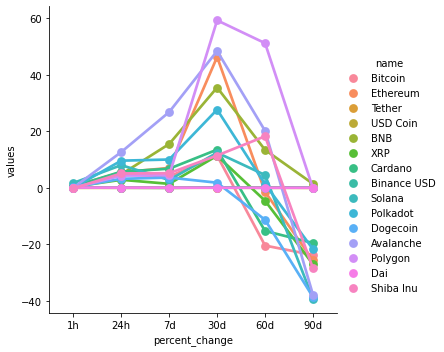

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)